# Homework 3: Particles Diffusion physics

## 1 First look at the problem

### 1.1 Introduction to diffusion

We are going to look at the concept of [diffusion](https://en.wikipedia.org/wiki/Diffusion) as a random process where the probability distribution, $P(r,t)$, of the position of a particular particle follows the dynamic of the diffusion equation with dimension $d$:



\begin{equation}
\frac{\partial P(r,t)}{\partial t} = \frac{1}{r^{d-1}}\frac{\partial}{\partial r}\left(r^{d-1}K(r)\frac{\partial P(r,t)}{\partial r}\right)
\tag{1}
\end{equation}

where $K(r)$ is the diffusivity (or the diffusion constant if independent of $r$ or $t$) and $r=\sqrt{\sum_{i=1}^d x_i^2}$ is the norm of the position vector $\mathbf{r}=\left(\begin{matrix}
  x_1  \\
  x_2  \\
  \vdots  \\
  x_d
 \end{matrix}\right)$. $P(r,t)$ satisfies

\begin{equation}
\int_{0}^{\infty}r^{d-1}P(r,t) = 1.
\end{equation}

as normalization condition. In the following we are going to look at the $d=1$ for the sake of simplicity.  This represents a particle moving along a straight line.
 
### 1.2 Power law diffusity: an interesting dynamic

We are going to assume that $K(r)$ is going to constant, this is what is called normal diffusion. We are going to consider the case of a power law diffusity:

\begin{equation}
K(r) = Dr^\alpha, \,\,\, 0<\alpha<2
\tag{2}
\end{equation}

This diffusivity induces a time evolution

\begin{equation}
\langle r^2(t)\rangle \sim g\left(Dt\right)^{2/\gamma}, \,\,\,\, g=\frac{\gamma^{4/\gamma}\Gamma\left(\frac{d+2}{\gamma}\right)}{\Gamma\left(\frac{d}{\gamma}\right)}
\tag{3}
\end{equation}

Where $\langle r^2(t)\rangle$ this is the ensemble average of the dispersion of the particles at time $t$.

And where $\Gamma(x)$ is the [gamma function](https://en.wikipedia.org/wiki/Gamma_function) and $\gamma=2-\alpha$. 
<br>
<br>
The PDF has a stretched-exponential distribution
<br>
\begin{equation}
P(r,t) = \frac{1}{\langle r^2(t)\rangle^{d/2}}\exp\left[-A\left(\frac{r}{\sqrt{\langle r^2(t)\rangle}}\right)^\gamma + B\right]
\tag{4}
\end{equation}

with

\begin{eqnarray}
A&=&\left[\frac{\Gamma\left(\frac{d+2}{\gamma}\right)}{\Gamma\left(\frac{d}{\gamma}\right)}\right]^{\gamma/2}\\
B&=&\log\left[\gamma\frac{\Gamma\left(\frac{d+2}{\gamma}\right)^{d/2}}{\Gamma\left(\frac{1}{\gamma}\right)^{(d+2)/2}}\right]
\end{eqnarray}

Henceforth we are going to work in the specific case of $d=1$, $\alpha=0$, $K=D=1$ for simplicity.  This corresponds to the particle points moving along a one dimensional line.

### 1.3 Solving the diffusion equation using a Monte Carlo method

The above diffusion equation has an equivalent [Ito](https://en.wikipedia.org/wiki/It%C3%B4_calculus) stochastic differential equation

\begin{equation}
dx = \sqrt{2K}dW
\end{equation}

with $W$ being a [Wiener process](https://en.wikipedia.org/wiki/Wiener_process) or Brownian motion. We can numerically integrate the stochastic equations using the [Euler-Maruyama](https://en.wikipedia.org/wiki/Euler%E2%80%93Maruyama_method) scheme:

\begin{equation}
x(T_i) = x(T_{i-1}) + \sqrt{2K\Delta T}N_{T}
\end{equation}
where $\Delta T = T_n - T_{n-1}$ is a discretized time increment and $N_{T}$ is a standard normal random variable. Remember we are going to assume $K=1$.

Thus for each increment of time a particle will move away from the previous point with a distance that is normally distributed.

### 1.4 Simulating to create our data

Let's make this simulation happen! We are going to write a function that generates particles paths under this diffusive dynamic. The output of this function will be a Pandas data frame with each row representing a particle and each column, a specific point in time. The values of this data frame will be the position (on a one dimensional graph) of the particles at the different point in time. 

Before writing this function, we are going explore how to do it.

>- First, create a data frame with 1000 columns (representing the points in time) and column names `T_0`, `T_1`, ..., `T_999`. We are going to use 100 rows (100 particles) for simplicity. 
- Fill this data frame with a normal noise in each cell using [`numpy.random.normal`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html) The random noises represent the changes in positions for each particle for each particular time value.
- Set the first column to 0 (start at $x(T=0)=0$).
- Use the pandas function [`cumsum`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.cumsum.html) to generate a cumulative sum of the columns which now represents the position of that particle at each time value

Doing so, you are creating stochastic paths for 100 particles for 1000 equally spaced time points starting at $T_0$ with $K=1$ and $\Delta T=1$. 

#### Import pandas and numpy packages

In [1]:
import pandas as pd
import numpy as np

#### Create the empty dataframe

In [2]:
data=pd.DataFrame(index=range(100),columns = ["T_" + str(i) for i in range(1000)])

data.head()

,T_0,T_1,T_2,T_3,T_4,T_5,T_6,T_7,T_8,T_9,...,T_990,T_991,T_992,T_993,T_994,T_995,T_996,T_997,T_998,T_999
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Fill each row with random normal variables and summing the over the rows

Remeber that differences between two adjacent time points is distributed as: $\sqrt{2K\Delta T}N_{T}$, we assume $K=1$ and $\Delta T=1$

In [3]:
for i in data.columns:
    data[i] = data[i].apply(lambda x: np.sqrt(2)*np.random.normal())
    
data.iloc[:,0] = 0          ## Set origin points to 0 
    
data = data.cumsum(axis=1)  ## Sum over rows

#### Plotting 10 sample paths

Lets see what our particles' paths look like.  Sample 10 particles from the dataframe and plot them on a time step vs position graph.

In [4]:
## Sample 10 data points 
## Transpose the dataframe so that the particle number are the columns and the points in time are the rows

data_sample = data.sample(n=10).transpose().reset_index(drop=True)
data_sample.head(10)

,45,35,36,14,77,30,46,97,3,55
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.232216,0.636079,1.107304,-4.097023,2.230583,-1.212393,-0.354972,-1.423681,0.007896,-2.007221
2,0.146473,0.748803,0.489954,-2.642970,3.320861,-0.633214,0.694328,-1.400183,-0.980820,-1.073537
3,-0.590356,-0.194908,0.925748,-2.031617,3.426084,-0.595786,1.942312,-3.187547,1.091332,-0.634099
4,-0.007180,-1.896527,1.486190,-4.132511,3.387964,-2.013525,1.144312,-3.350107,1.941334,-1.154503
5,-2.395372,-1.219910,-0.806839,-3.276017,3.037488,-2.049135,2.697257,-3.877837,-1.407409,0.231927
6,-2.303723,0.543985,-1.753048,-6.949487,2.504783,-3.240301,2.646300,-2.566364,-1.783758,1.515835
7,-1.992122,-0.782022,-0.849146,-6.699932,1.631676,-4.705357,0.490777,-3.696679,-1.808070,1.317000
8,-2.489620,-1.651805,0.359204,-6.404469,1.150171,-5.310210,-0.734638,-3.100699,-2.646334,0.884357
9,-4.443425,-0.687489,-0.810753,-6.014580,0.514135,-5.136536,-0.496478,-2.535766,-1.846809,-0.227424


In [5]:
## Import MATPLOTLIB
%matplotlib inline
import matplotlib.pyplot as plt

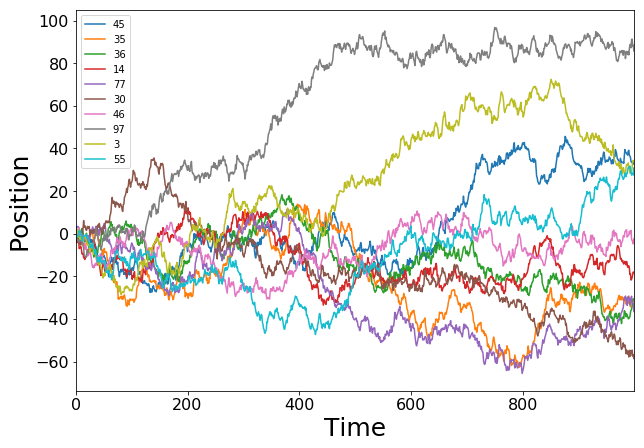

In [73]:
## Plot data

plot1=data_sample.plot(fontsize=16,figsize=[10,7])
plot1.set_xlabel("Time", fontsize=25)
plot1.set_ylabel("Position",fontsize=25)
plot1.legend(fontsize=10)
plt.show()


#### Creating a general function that creates a data frame with stochastic paths

 Now that we understand how to generate stochastic paths, let's write this function `run_simulation`. Our function should use the different arguments $K$, $\Delta T$, the number of particles `num_particles` and the number of time steps `max_time` to return the desired data frame according to:
\begin{equation}
x(T_i) = x(T_{i-1}) + \sqrt{2K\Delta T}N_{T}
\end{equation}

In [7]:
def run_simulation(num_particle, max_time, K, deltaT):
    frame = pd.DataFrame(index=range(num_particle),columns = ["T_" + str(i) for i in np.arange(0,deltaT*max_time,deltaT)])
    for i in frame.columns:
        frame[i] = frame[i].apply(lambda x: np.sqrt(2*K*deltaT)*np.random.normal())
    frame.iloc[:,0] = 0
    frame=frame.cumsum(axis=1)
    
    return frame

The 'diffusion_filled_df' will contain the paths for 100 particles for each 1000 time steps

In [8]:
diffusion_filled_df = run_simulation(100, 1000, 1, 1)
diffusion_filled_df.head(10)

,T_0,T_1,T_2,T_3,T_4,T_5,T_6,T_7,T_8,T_9,...,T_990,T_991,T_992,T_993,T_994,T_995,T_996,T_997,T_998,T_999
0,0.0,-0.392584,0.271882,1.885269,0.578623,-0.530388,0.896811,0.891636,1.267748,2.357549,...,-29.801509,-28.850359,-32.105914,-33.147146,-32.898427,-34.390270,-34.516739,-35.208889,-35.897153,-35.328615
1,0.0,1.713000,4.437683,2.819865,0.535464,-0.489061,1.256184,0.874373,1.640952,3.012662,...,-14.178546,-14.473515,-13.268266,-14.164275,-15.524726,-13.018175,-14.364059,-11.545270,-13.834536,-13.362592
2,0.0,-0.604159,-1.287932,-0.476499,0.211890,-3.054399,-5.906699,-5.798670,-7.149732,-8.405880,...,-2.176676,-2.521131,-0.730490,0.397329,0.730032,0.670317,0.860111,2.302946,0.942006,-1.663975
3,0.0,-0.381310,-2.811771,-0.305226,2.789333,3.710675,6.519511,2.399292,3.256974,6.540550,...,63.210106,62.072563,61.888761,59.082045,56.739241,55.709540,56.908505,58.966283,60.440466,60.223865
4,0.0,0.168513,0.127020,-0.502557,0.837094,2.238980,2.887683,1.125297,5.360378,4.634792,...,-43.435590,-42.455898,-42.511709,-41.035554,-42.367146,-41.615036,-40.809054,-39.580436,-40.203525,-38.371207
5,0.0,-1.336337,-0.411011,0.631427,0.046799,2.235177,0.430795,0.142103,-1.368457,-0.713960,...,-23.087245,-21.832832,-23.428435,-21.883203,-24.184962,-24.956417,-24.802832,-23.134247,-22.697454,-20.271940
6,0.0,-0.567936,2.054224,-0.768896,-2.456587,-3.741227,-4.408109,-4.704119,-4.798953,-2.830307,...,67.833589,67.503297,67.112291,67.835473,67.006202,69.618435,70.743911,69.597651,71.527943,71.405029
7,0.0,1.989919,2.537382,5.794817,6.906466,7.581791,7.365151,7.160203,6.330234,5.316763,...,4.195328,4.295488,6.066899,7.603124,7.316992,7.145986,6.176493,7.513810,6.692228,4.795713
8,0.0,-2.192702,-2.725388,-0.720064,-0.340434,-0.051860,0.985804,-0.234448,-1.354956,-2.140459,...,5.332911,2.641858,2.745101,3.687366,2.534855,2.263237,4.393791,2.896535,2.321358,3.437980
9,0.0,-0.265546,-0.799525,-2.223584,-2.543444,-1.877401,-2.509453,-1.378978,-2.280235,-4.320691,...,-8.209898,-8.458469,-8.246765,-9.035313,-7.928502,-9.990553,-10.552727,-11.809727,-12.687199,-10.669225


## 2 Studying the data

Up to now, everything was a pretext to create some data to study. Let's try to understand a bit more the physics of those particles. 

### 2.1 The dispersion


We are going to start by computing the average dispersion $\langle \Vert \mathbf{r}(t)\Vert^2\rangle$ (which is just $\langle r(t)^2\rangle$ in one dimension), at different points in time.  The dispersion is a measure of spread among the particles in our system.

>- Let's create a dataframe `dispersion_df` by taking the square the elements of the resulting dataframe using the [`pow`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pow.html) function
- We now take the mean ([`mean`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html)) and standard deviation ([`std`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.std.html)) of every column.

We want to observe how much the particles vary in position for particular time value.  From before the 100 particules give us an idea of the distrubtion we are working with.  When the particles start close to the origin, we would expect the dispersion of the system to be low since the particles have not had time to diffuse further.  When given sufficient time, the particles move further away from the origin point and we would expect the dispersion to increase and time increases. 

To be clear, the dispersion, $r^2(t)$ is itself a random variable that depends on the time time step, we want to estimate the "true" average of the dispersion $\langle {r}(t)^2\rangle$ by estimating it with the average:
$$\widehat{\langle {r}(t)^2\rangle}=\sum_{i=1}^{N} \frac{{r_i}^2(t)}{N}$$

Where $N$ is the number of particles, and $r_i$ is the the position of particle $i$ at time $t$.  We will now calculate the dispersion for our 100 particle system:
 

In [69]:
dispersion_df = pd.DataFrame()
for i in diffusion_filled_df.columns:
        dispersion_df[i] = diffusion_filled_df[i].apply(lambda x: x**2)
        
dispersion_df.head()

,T_0,T_1,T_2,T_3,T_4,T_5,T_6,T_7,T_8,T_9,...,T_990,T_991,T_992,T_993,T_994,T_995,T_996,T_997,T_998,T_999
0,0.0,0.154122,0.073920,3.554240,0.334804,0.281311,0.804270,0.795015,1.607185,5.558036,...,888.129942,832.343232,1030.789689,1098.733258,1082.306480,1182.690694,1191.405244,1239.665862,1288.605586,1248.111034
1,0.0,2.934370,19.693031,7.951638,0.286721,0.239181,1.577997,0.764528,2.692725,9.076131,...,201.031180,209.482639,176.046895,200.626679,241.017122,169.472869,206.326177,133.293256,191.394389,178.558854
2,0.0,0.365007,1.658770,0.227051,0.044897,9.329352,34.889090,33.624570,51.118665,70.658821,...,4.737917,6.356103,0.533616,0.157871,0.532947,0.449325,0.739791,5.303561,0.887376,2.768812
3,0.0,0.145397,7.906057,0.093163,7.780379,13.769108,42.504018,5.756601,10.607879,42.778789,...,3995.517441,3853.003105,3830.218725,3490.688055,3219.341505,3103.552897,3238.577887,3477.022579,3653.049887,3626.913864
4,0.0,0.028396,0.016134,0.252564,0.700726,5.013032,8.338713,1.266293,28.733650,21.481297,...,1886.650444,1802.503244,1807.245363,1683.916702,1794.975045,1731.811262,1665.378903,1566.610887,1616.323396,1472.349545


Taking the mean of every column will yield the estimate of the dispersion at each time step.

In [10]:
dispersion_avg = dispersion_df.apply(lambda r: pd.Series({'mean': r.mean(), 'std': r.std()})).transpose()
dispersion_avg.head(10)

,mean,std
T_0,0.000000,0.000000
T_1,2.011815,2.507906
T_2,4.197619,5.621622
T_3,6.132131,9.652642
T_4,8.753821,12.774944
T_5,10.566227,15.779027
T_6,11.261969,15.838171
T_7,13.216566,18.538620
T_8,14.748002,20.132115
T_9,15.297276,19.985217


### 2.2 The confidence interval

Because we computed the sample standard deviation, we can estimate the confidence interval of the mean of the dispersion.  To be clear, the random variable we are finding the confidence interval for is the dispersion, which itself is a measure of variance of the particle system.



Under the assumption that $r(t)^2$ is normally distributed, we estimate the 95% confidence interval at time $t$ as:

\begin{equation}
\left(\widehat{\langle {r}(t)^2\rangle} - c\frac{S}{\sqrt{N}},\widehat{\langle {r}(t)^2\rangle} + c\frac{S}{\sqrt{N}}\right)
\end{equation}

where $S$ is the estimate of the standard deviation, $N$ is the number of samples used (here the number of particles) and $c$ is a critical point we chose depending on the on confidence level on the average we require. Because the standard deviation is unknown (we are estimating it), $c$ is chosen according to the [Student's t-distribution](https://en.wikipedia.org/wiki/Student%27s_t-distribution). For example, when $L$ is very large, $c\simeq1.96$ gives a 95% confidence level for this confidence interval. 

Lets plot the dispersion as a function of the time step and impose the confidence levels at each time time step. 

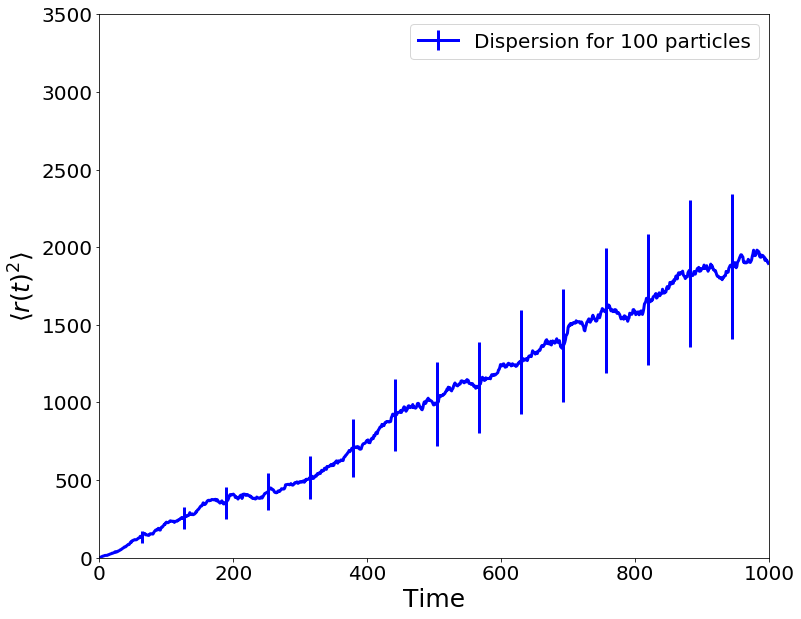

In [13]:
## Time array given that delta T = 1 and max_time is 1000 
T = np.arange(0,1000,1)
## Number of particles
n = 100

plt.figure()
plt.errorbar(x=T,
         y=dispersion_avg["mean"],
         yerr=1.96*dispersion_avg["std"]/np.sqrt(n),
         errorevery=63,
         lw=3,
         color='b',
         label='Dispersion for 100 particles')

plt.rcParams["figure.figsize"] = [12,10]
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.xlabel("Time", fontsize=25)
plt.ylabel(r"$\langle {r}(t)^2\rangle$", fontsize=25)
plt.xlim(0,1000)
plt.ylim(0,3500)
plt.legend(fontsize=20) 
plt.show()

The standard error of the dispersion unsurprisingly increases with the time step.  There does seem to be a linear pattern with the dispersion.

Increasing the the number of particles should give us a clearer of measure of the dispersion.  

>- Repeat the simulation process until you find a number of particles that yield negligeable confidence intervals. 
- Plot the confidence interval curves for total 3 different values of `num_particles` to highlight the evolution of the errobars when the number of particles is increased.


In [14]:
## Choosing 3 particle numbers

num_part1 = 100  ## We already did this one already
num_part2 = 1000
num_part3 = 50000

Measure the dispersion for 1000 particles

In [15]:
diffusion_filled_df_2 = run_simulation(num_part2, 1000, 1, 1)

dispersion_df_2 = pd.DataFrame()
for i in diffusion_filled_df_2.columns:
        dispersion_df_2[i] = diffusion_filled_df_2[i].apply(lambda x: x**2)
        

dispersion_avg_2 = dispersion_df_2.apply(lambda r: pd.Series({'mean': r.mean(), 'std': r.std()})).transpose()


Measure the dispersion for 1000 particles

In [16]:
diffusion_filled_df_3 = run_simulation(num_part3, 1000, 1, 1)

dispersion_df_3 = pd.DataFrame()
for i in diffusion_filled_df_3.columns:
        dispersion_df_3[i] = diffusion_filled_df_3[i].apply(lambda x: x**2)
        
dispersion_avg_3 = dispersion_df_3.apply(lambda r: pd.Series({'mean': r.mean(), 'std': r.std()})).transpose()

Plot the dispersion over time step graphs with the confidence intervals for each of the 3 different number of particle cases.

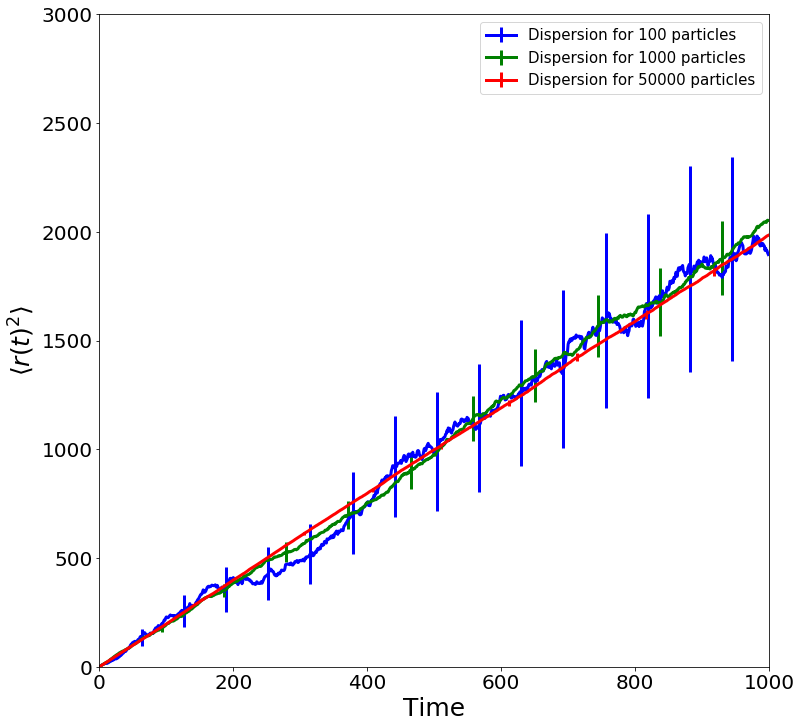

In [68]:
# This is the time steps
T = np.arange(0,1000,1)

plt.figure()

# Plot for 100 particles
plt.errorbar(x=T,
         y=dispersion_avg["mean"],
         yerr=1.96*dispersion_avg["std"]/np.sqrt(num_part1),
         errorevery=63,
         lw=3,
         color='b',
         label='Dispersion for 100 particles')

# Plot for 1000 particles
plt.errorbar(x=T,
         y=dispersion_avg_2["mean"],
         yerr=1.96*dispersion_avg_2["std"]/np.sqrt(num_part2),
         errorevery=93,
         lw=3,
         color='green',
         label='Dispersion for 1000 particles')

# Plot for 50000 particles
plt.errorbar(x=T,
         y=dispersion_avg_3["mean"],
         yerr=1.96*dispersion_avg_3["std"]/np.sqrt(num_part3),
         errorevery=102,
         lw=3,
         color='red',
         label='Dispersion for 50000 particles')

plt.rcParams["figure.figsize"] = [12,10]
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.xlabel("Time", fontsize=25)
plt.ylabel(r"$\langle {r}(t)^2\rangle$", fontsize=25)
plt.xlim(0,1000)
plt.ylim(0,3000)
plt.legend(fontsize=15)
plt.show()

~50,000 particles (the red line) seems to give statistically convergent averages.  We now observe a clear linear relationship between the dispersion and the time step.

The theoretical relationship between dispersion and time is given by equation $(3)$:

\begin{equation}
\langle r^2(t)\rangle \sim g\left(Dt\right)^{2/\gamma}, \,\,\,\, g=\frac{\gamma^{4/\gamma}\Gamma\left(\frac{d+2}{\gamma}\right)}{\Gamma\left(\frac{d}{\gamma}\right)}
\end{equation}

From the graph we observe a linear relationship: $ \langle r^2(t)\rangle \propto t$, this implies that $\gamma =2$

### 2.3 Estimating the slope

If $\gamma=2$, then  $\alpha = \gamma -2 = 0$, which we had assumed in the beginning section:

Thus:

\begin{equation}
K = Dr^\alpha = D = 1
\end{equation}

and plugging into equation $(3)$:

\begin{equation}
\langle r^2(t)\rangle = (gD)*t
\end{equation}

Now we can solve for $g*D$ and approximate the theoretical slope and observe how diffusion system dispersion behaves. First we need to write a function to calculate g, from equation $(3)$, remember we assume the one dimenstional case $d=1$:


$$g=\frac{\gamma^{4/\gamma}\Gamma\left(\frac{d+2}{\gamma}\right)}{\Gamma\left(\frac{d}{\gamma}\right)}$$

In [27]:
# Import Gamma function
from scipy.special import gamma as G

# TODO: write a function that compute g
def g(gamma, d):
    return (gamma**(4/gamma))*G((d+2)/gamma)/G(d/gamma)

Plot dispersion divided by time step to evaluate the slope

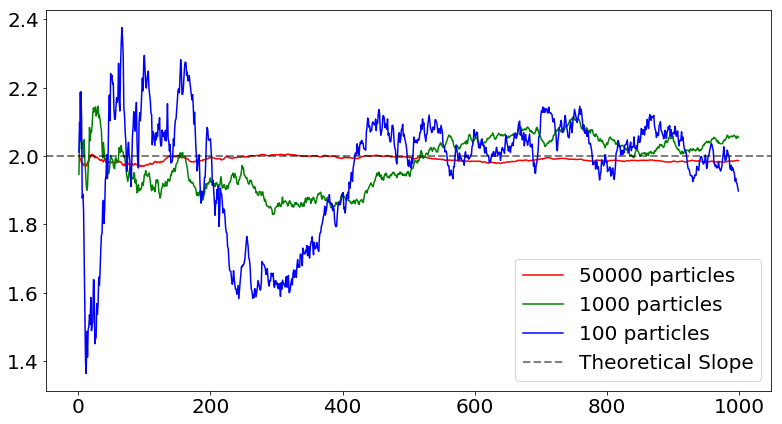

In [56]:
# Plot the esimated slopes for the 3 systems with varying particle numbers
plt.figure(figsize=(13,7))
plt.plot(T, dispersion_avg_3["mean"]/T, label="50000 particles",color="red")
plt.plot(T, dispersion_avg_2["mean"]/T, label="1000 particles",color="green")
plt.plot(T, dispersion_avg["mean"]/T, label="100 particles",color="blue")

# Given the parameters
K = 1
gamma = 2
d = 1

# Plot theoretical slope value
plt.axhline(y = g(gamma, d) * K, 
           color="black", 
           lw=2, 
           ls="--",
           label = 'Theoretical Slope',
           alpha=0.5)

plt.legend(fontsize=20)
plt.show()

The 50,000 particle system this approximates the theoretical dispersion/time slope fairly well.

### 2.4 Estimating the probability distribution

We now going to estimate the probability distribution $P(r,t)$.  Recall that $r$ refers to the absolute position away from the origin. To estimate a probability distribution at $r_i$ and $t=t^*$, we can simply count the number of samples in a small region $\Delta r_i$ around $r_i$. Because we have $d=1$ and:

\begin{equation}
\int_{0}^{\infty}r^{d-1}P(r,t) = 1
\end{equation}

We need our estimate $\hat{P}(r_i,t^*)$ of the probabitity distribution to sum to one:

\begin{equation}
\sum_{i=1}^{M}\hat{P}(r_i,t^*)\Delta r_i = 1
\end{equation}

where $M$ is the number of discretized space increments ("cuts") $\Delta r_i$. Therefore we can estimate 

\begin{equation}
\hat{P}(r_i,t^*) = \frac{n}{N\Delta r_i}
\end{equation}

where $n$ is the number of samples in the interval $\Delta r_i$ at time $t^*$ and $N$ is the total number of samples. Let's check that this work:

\begin{equation}
\sum_{i=1}^{M}\hat{P}(r_i,t^*)\Delta r_i = \sum_{i=1}^{M}\frac{n}{N\Delta r_i}\Delta r_i= \frac{1}{N}\sum_{i=1}^{M}n =1
\end{equation}

For our estimate we decide for $r_i$ to be the median of the position values contained within each  $\Delta r_i$


The function below should take in a pandas series of the absolute particle position values and the number of desired number of cuts $M$ and will return the probability estimate at each cut and the median of the position values within each cut.

In [174]:
def compute_prob_distribution(absolute_position, num_cuts):
    
    absolute_position_copy = absolute_position.copy().to_frame("Position")
    
    # TODO: cut absolute_position using qcut and num_cuts
    absolute_position_copy["cut"], bins = pd.qcut(x = absolute_position,q = num_cuts, retbins=True)
    
    # TODO: compute deltaR
    deltaR = deltaR = bins[1:] - bins[:-1]
    
    # TODO: compute the counts per cuts of the column "cut"
    counts = absolute_position_copy.groupby("cut")["cut"].count()
    
    # TODO: normalize the counts to get the probability distribution
    pdf = counts/(deltaR * len(absolute_position))
    
    # TODO: compute the median per cuts of the column "cut" of the absolute position
    r = absolute_position_copy.groupby('cut')["Position"].apply(np.median)
    
    return pdf, r


### 2.5 Computing the theoretical density

We are going to compare the result of this function with the theoretical results. Given that $d=1$ and $\gamma=2$, equation $(5)$ becomes:

\begin{equation}
P(r,t) = \frac{1}{\langle r^2(t)\rangle^{1/2}}\exp\left[-A\left(\frac{r}{\sqrt{\langle r^2(t)\rangle}}\right)^2 + B\right]
\end{equation}

with

\begin{eqnarray}
A&=&\left[\frac{\Gamma\left(\frac{3}{2}\right)}{\Gamma\left(\frac{1}{2}\right)}\right]\\
B&=&\log\left[2\frac{\Gamma\left(\frac{3}{2}\right)^{1/2}}{\Gamma\left(\frac{1}{2}\right)^{(3)/2}}\right]
\end{eqnarray}

Remember that $\langle r^2(t)\rangle$ is the dispersion at time $t$.

<br>


Now lets do the following:

- Write a function `A(gamma, d)`
- Write a function `B(gamma, d)`
- Write a function for the average `dispersion` which is a function of $t$ that returns $gDt$. You already wrote the function that computes $g$ and we are assuming $D=1$
- Write a function `pdf(gamma, d, r, t, D)` with `r` being an array of absolute positions $r$ and `t` the time the pdf is computed. 

In [38]:
# TODO: write a function that computes A
def A(gamma, d):
    return (G((d+2)/gamma)/G(d/gamma))**(gamma/2)

# TODO: write a function that computes B
def B(gamma, d):
    return np.log(gamma*(G((d+2)/gamma)**(d/2))/(G(1/gamma))**((d+2)/2))

# TODO: write a function that computes the dispersion
def dispersion(gamma, d, t, D):
    return g(gamma,d)*(D*t)**(2/gamma)

# TODO: write a function that computes the theoretical PDF
def pdf(gamma, d, r, t, D):
    return ((1/(dispersion(gamma, d, t, D)**(d/2)))*
            np.exp(-A(gamma, d)*
                   ((r/np.sqrt(dispersion(gamma, d, t, D)))**gamma)+
                   B(gamma, d)))

### Plotting the estimated density and the theoretical density

We choose to plot the densities for $t=999$ for our 50,000 particle system.

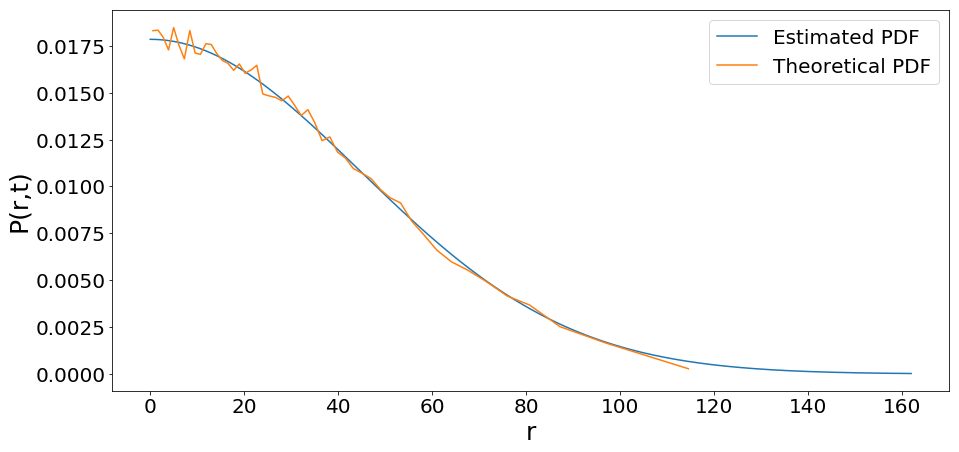

In [175]:
# Values for the theoretical pdf
values = np.linspace(0,162, 1000)

# Estimated PDF
t_pdf,t_r = compute_prob_distribution(diffusion_filled_df_3["T_999"].abs(), 50)

# Parameters
K = 1
gamma = 2
d = 1
D = 1 


plt.figure(figsize=(15,7))
plt.plot(values, pdf(gamma,d,values,999,D),label = "Estimated PDF")
plt.plot(t_r,t_pdf,label='Theoretical PDF')
plt.legend(fontsize=20)
plt.xlabel('r', fontsize=25)
plt.ylabel("P(r,t)", fontsize=25)
plt.show()

With our 50,000 particle system, the estimate distribution of particle positions is approximates fairly well to the theoretical distribution.  We notice that for diffusive systems, at any time, the probability of being near the origin is highest and the probability decays in an exponential manner away from the origin point.

### 2.5 The self-similarity of the probability distribution

Notice that if we take the logarithm of equation $(4)$:

\begin{equation}
\log\left(P(r,t)\langle r^2(t)\rangle^{1/2}\right) = -A\left(\frac{r}{\sqrt{\langle r^2(t)\rangle}}\right)^2 + B
\end{equation}

If we look at the relationship of $Y=\log\left(P(r,t)\langle r^2(t)\rangle^{1/2}\right)$ versus $X=\left(\frac{r}{\sqrt{\langle r^2(t)\rangle}}\right)^2$ for any $r$ and $t$, we should observe a linear relationship.

> Using your statistical estimation of the the PDF, plot on the same graph $\log\left(P(r,t)\langle r^2(t)\rangle^{1/2}\right)$ versus $\left(\frac{r}{\sqrt{\langle r^2(t)\rangle}}\right)^\gamma$ for:
$t=199,399,599,799,999$


In [176]:
## Creating a function that graphs the log relationship 

def GraphLog(gamma,d,t,D):
    pdf1,r1 = compute_prob_distribution(diffusion_filled_df_3["T_"+str(t)].abs(), 50)
    
    Y1 = np.log(pdf1*(dispersion(gamma, d, t, D)**(d/2)))
    
    X1 = (r1/np.sqrt(dispersion(gamma, d, t, D)))**2
    
    return plt.plot(X1,Y1,label="t="+str(t))

Now lets plot the log graphs for the 5 different time steps

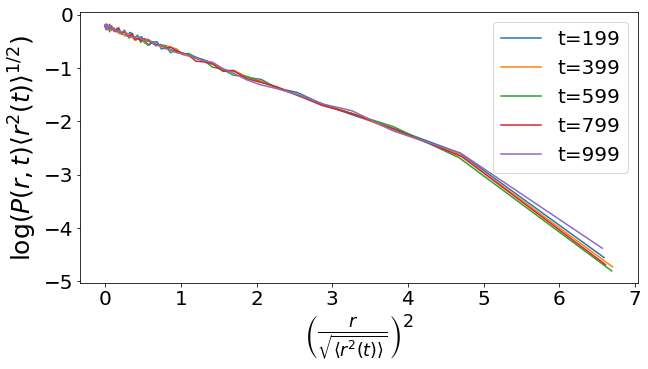

In [177]:
# Assumed parameters
K = 1
gamma = 2
d = 1
D = 1

plt.figure(figsize=(10,5))
GraphLog(gamma,d,199,D)
GraphLog(gamma,d,399,D)
GraphLog(gamma,d,599,D)
GraphLog(gamma,d,799,D)
GraphLog(gamma,d,999,D)

plt.legend(fontsize=20)
plt.ylabel(r"$ \log (P(r,t) \langle r^2(t) \rangle^{1/2} ) $", fontsize=25)
plt.xlabel(r"$\left(\frac{r}{\sqrt{\langle r^2(t)\rangle}}\right)^2 $",fontsize=25)
plt.show()

We see a linear relationship that is independent of the time step. If we can find the log graph for a time step $t_1$ we can solve for another log graph for any arbitrary time step $t_2$